(ft4)=
# Unit 4.4: Introduction to Filters

## Colophon

An annotatable worksheet for this presentation is available as {ref}`ws9`.

* The source code for this page is [fourier_transform/4/ft4.md](https://github.com/cpjobling/eg-247-textbook/blob/master/fourier_transform/4/ft4.md).

* You can view the notes for this presentation as a webpage ({ref}`ft4`). 

* This page is downloadable as a [PDF](https://cpjobling.github.io/eg-247-textbook/fourier_transform/4/ft4.pdf) file.

## Scope and Background Reading

This section is Based on the section **Filtering** from Chapter 5 of [Benoit Boulet, Fundamentals of Signals and Systems](https://ebookcentral.proquest.com/lib/swansea-ebooks/reader.action?ppg=221&docID=3135971&tm=1518715953782){cite}`boulet` from the **Recommended Reading List**.

This material is an introduction to analogue filters. You will find much more in-depth coverage on [Pages 11-1&mdash;11-48](https://ebookcentral.proquest.com/lib/swansea-ebooks/reader.action?ppg=429&docID=44853&tm=1518716026573) of {cite}`karris`.

## Agenda

* Frequency Selective Filters

* Ideal low-pass filter

* Butterworth low-pass filter

* High-pass filter

* Bandpass filter

## Introduction

* Filter design is an important application of the Fourier transform
* Filtering is a rich topic often taught in graduate courses so we give only an introduction.
* Our introduction *will* illustrate the usefulness of the frequency domain viewpoint.
* We will explore how filters can shape the spectrum of a signal.

Other applications of the Fourier transform are sampling theory (introduced next week) and modulation.

## Frequency Selective Filters

An ideal frequency-selective filter is a system that let's the frequency components of a signal through undistorted while frequency components at other frequency are completely cut off.

* The range of frequencies which are let through belong to the **pass Band**
* The range of frequencies which are cut-off by the filter are called the **stopband**
* A typical scenario where filtering is needed is when noise $n(t)$ is added to a signal $x(t)$ but that signal has most of its energy outside the bandwidth of a signal.

### Typical filtering problem

![Typical filtering problem](./pictures/filter1.png)

### Signal

![Signal](./pictures/filter2.png)

### Out-of Bandwidth Noise 

![Out of bandwidth noise](./pictures/filter3.png)

### Signal plus Noise

![Signal plus noise](./pictures/filter4.png)

### Results of filtering

![Results of filtering](./pictures/filter5.png)

### Motivating example

See the video and script on [*Canvas Week 6*](https://canvas.swansea.ac.uk/courses/44853/pages/motivating-example-filter-design-using-matlab?module_item_id=2484097).

(ft4:ideal_lp_filter)=
## Ideal Low-Pass Filter (LPF)

An ideal low pass filter cuts-off frequencies higher than its *cut-off frequency*, $\omega_c$.

$$H_{\rm{lp}}(\omega ) = \left\{ {\begin{array}{*{20}{c}}
{1,}&{|\omega |{\kern 1pt} \, < {\omega _c}}\\
{0,}&{|\omega |{\kern 1pt} \, \ge {\omega _c}}
\end{array}} \right.$$

### Frequency response of an ideal LPF

![Frequency response of an ideal LPF](./pictures/ideal_lpf.png)

### Impulse response of an ideal LPF

$$h_{\rm{lp}}(t) = \frac{\omega _c}{\pi }{\mathop{\rm sinc}\nolimits} \left( \frac{\omega _c}{\pi }t \right)$$

![Impulse response of an ideal LPF](./pictures/sinc.png)

### Filtering is Convolution

The output of an LTI system with impulse response 

$$h(t) \Leftrightarrow H(\omega)$$

subject to an input signal

$$x(t) \Leftrightarrow X(\omega)$$

is given by 

$$y(t) = h(t)*x(t) \Leftrightarrow Y(\omega) = H(\omega)X(\omega)$$

### Issues with the "ideal" filter

This is the step response:

![Step response of ideal LPF](./pictures/step_r.png)

(reproduced from {cite}`boulet` Fig. 5.23 p. 205)

Ripples in the impulse resonse would be undesireable, and because the impulse response is non-causal it cannot actually be implemented.

## Butterworth low-pass filter

N-th Order Butterworth Filter

$$\left| H_B(\omega ) \right| = \frac{1}{\left(1 + \left(\frac{\omega }{\omega _c}\right)^{2N}\right)^{\frac{1}{2}}}$$

**Remarks**

* DC gain is 

  $$|H_B(j0)|=1$$

* Attenuation at the cut-off frequency is 

  $$|H_B(j\omega_c)|=1/\sqrt{2}$$ 
  
  for any $N$

More about the Butterworth filter: [Wikipedia Article](https://en.wikipedia.org/wiki/Butterworth_filter)

### Example 5: Second-order BW Filter

The second-order butterworth Filter is defined by is Characteristic Equation (CE):

$$p(s) = s^2 + \omega_c\sqrt{2}s+\omega_c^2 = 0^*$$

Calculate the roots of $p(s)$ (the poles of the filter transfer function) in both Cartesian and polar form.

**Note**: This has the same characteristic as a control system with damping ratio $\zeta = 1/\sqrt{2}$ and $\omega_n = \omega_c$!

### Example 6

Derive the differential equation relating the input $x(t)$ to output $y(t)$ of the 2nd-Order Butterworth Low-Pass Filter with cutoff frequency $\omega_c$.

### Example 7

Determine the frequency response $H_B(\omega)=Y(\omega)/X(\omega)$

### Magnitude of frequency response of a 2nd-order Butterworth Filter

In [7]:
wc = 100;

Transfer function

In [8]:
H = tf(wc^2,[1, wc*sqrt(2), wc^2])


H =
 
          10000
  ---------------------
  s^2 + 141.4 s + 10000
 
Continuous-time transfer function.


Poles of $H(s)$

In [9]:
[poles] = pole(H)


poles =

 -70.7107 +70.7107i
 -70.7107 -70.7107i



Natural frequency $\omega_n$ and damping ratio $\zeta$ of the poles

In [10]:
[mag,phase] = damp(H)


mag =

   100
   100


phase =

    0.7071
    0.7071



Phase of the poles

In [11]:
phase = angle(poles)*180/pi % degrees


phase =

   135
  -135



Magnitude frequency response

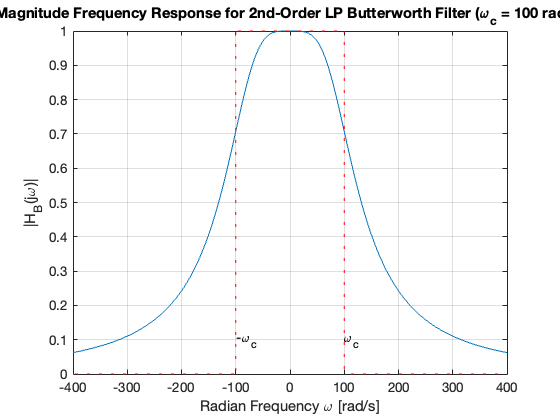

In [12]:
w = -400:400;
mHlp = 1./(sqrt(1 + (w./wc).^4));
plot(w,mHlp)
grid
ylabel('|H_B(j\omega)|')
title('Magnitude Frequency Response for 2nd-Order LP Butterworth Filter (\omega_c = 100 rad/s)')
xlabel('Radian Frequency \omega [rad/s]')
text(100,0.1,'\omega_c')
text(-100,0.1,'-\omega_c')
hold on
plot([-400,-100,-100,100,100,400],[0,0,1,1,0,0],'r:')
hold off

Bode plot

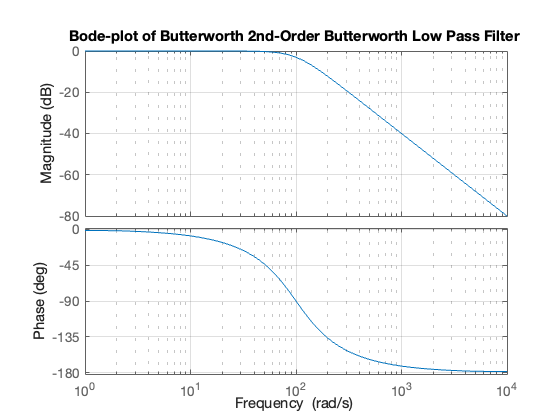

In [13]:
bode(H)
grid
title('Bode-plot of Butterworth 2nd-Order Butterworth Low Pass Filter')

Note that the attentuation of the filter is flat at 0 dB in the pass-band at frequencies below the cut-off frequency $\omega < \omega_c$; has a value of $-3$ dB at the cut-off frquency $\omega = \omega_c$; and has a "roll-off" (rate of decrease) of $N\times 20$ dB/decade in the stop-band. 

In this case, $N=2$, and $\omega_c = 100$ rad/s so the attenuation is -40 dB at $\omega = 10\omega_c = 1,000$ rad/s and $\omega = -80$ dB at $\omega = 100\omega_c = 10,000$ rad/s.

The phase is $0^\circ$ at $\omega = 0$; $N\times 90^\circ$ at $\omega = \infty$; and $N\times 45^\circ$ and $\omega = \omega_c$.

### Example 8

Determine the impulse and step response of a butterworth low-pass filter.

You will find this Fourier transform pair useful:

$$e^{-at}\sin\omega_0 t\;u_0(t) \Leftrightarrow \frac{\omega_0}{(j\omega + a)^2+\omega_0^2}$$

Impulse response

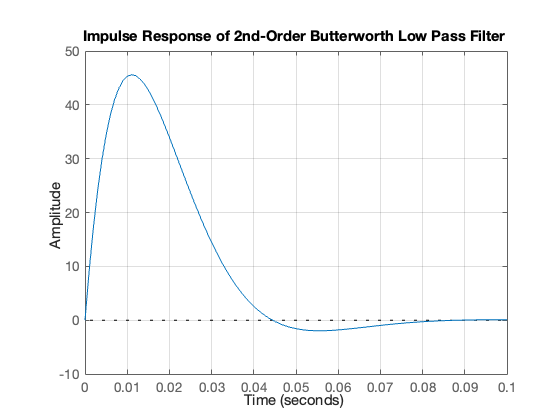

In [14]:
impulse(H,0.1)
grid
title('Impulse Response of 2nd-Order Butterworth Low Pass Filter')

Step response

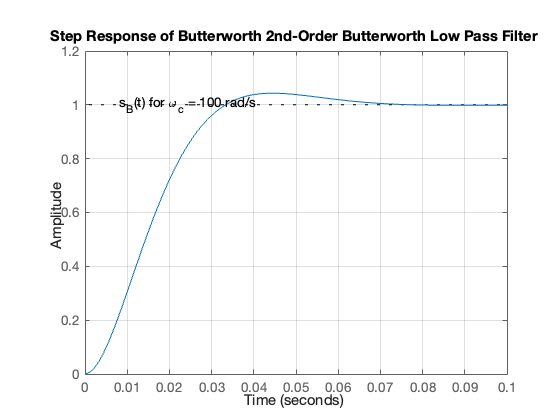

In [15]:
step(H,0.1)
title('Step Response of Butterworth 2nd-Order Butterworth Low Pass Filter')
grid
text(0.008,1,'s_B(t) for \omega_c = 100 rad/s')

## High-pass filter (HPF)

An ideal highpass filter cuts-off frequencies lower than its *cutoff frequency*, $\omega_c$.

$$H_{\rm{hp}}(\omega ) = \left\{ {\begin{array}{*{20}{c}}
{0,}&{|\omega |{\kern 1pt} \, \le {\omega _c}}\\
{1,}&{|\omega |{\kern 1pt} \, > {\omega _c}}
\end{array}} \right.$$

### Frequency response of an ideal HPF

![Frequency response of an ideal HPF](./pictures/ideal_hpf.png)

### Responses

**Frequency response**

$$H_{\mathrm{hp}}(\omega)=1-H_{\mathrm{lp}}(\omega)$$

**Impulse response**

$$h_{\mathrm{hp}}(t)=\delta(t)-h_{\mathrm{lp}}(t)$$

### Example 9

Determine the frequency response of a 2nd-order butterworth highpass filter

Magnitude frequency response

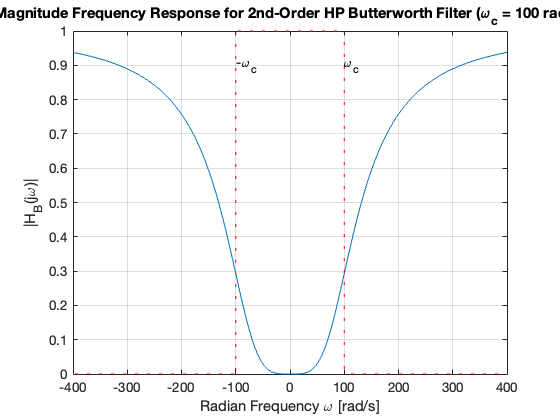

In [16]:
w = -400:400;
plot(w,1-mHlp)
grid
ylabel('|H_B(j\omega)|')
title('Magnitude Frequency Response for 2nd-Order HP Butterworth Filter (\omega_c = 100 rad/s)')
xlabel('Radian Frequency \omega [rad/s]')
text(100,0.9,'\omega_c')
text(-100,0.9,'-\omega_c')
hold on
plot([-400,-100,-100,100,100,400],[0,0,1,1,0,0],'r:')
hold off

High-pass filter


Hhp =
 
      s^2 + 141.4 s
  ---------------------
  s^2 + 141.4 s + 10000
 
Continuous-time transfer function.


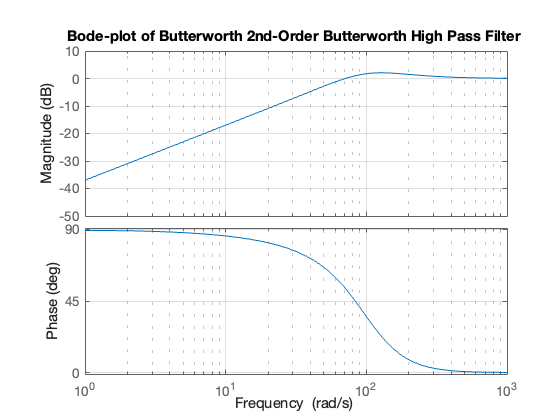

In [17]:
Hhp = 1 - H
bode(Hhp)
grid
title('Bode-plot of Butterworth 2nd-Order Butterworth High Pass Filter')

## Band-pass filter (BPF)

An ideal bandpass filter cuts-off frequencies lower than its first *cutoff frequency* $\omega_{c1}$, and higher than its second *cutoff frequency* $\omega_{c2}$.

$$H_{\rm{bp}}(\omega ) = \left\{ {\begin{array}{*{20}{c}}
{1,}&\omega _{c1} < \,|\omega |\, < \omega _{c2}\\
{0,}&\rm{otherwise}
\end{array}} \right.$$

### Frequency response of an ideal BPF

![Frequency response of an ideal BPF](./pictures/bbpmfr.png)

### Bandpass filter design

A bandpass filter can be obtained by multiplying the frequency responses of a lowpass filter by a highpass filter.

$$H_{\mathrm{bp}}(\omega) = H_{\mathrm{hp}}(\omega)H_{\mathrm{lp}}(\omega)$$

* The highpass filter should have cut-off frequency of $\omega_{c1}$

* The lowpass filter should have cut-off frequency of $\omega_{c2}$

## Summary

* Frequency-Selective Filters
* Ideal low-pass filter
* Butterworth low-pass filter
* High-pass filter
* Bandpass filter

## Solutions

### Handwritten 

Solutions to Examples 5-9 are captured as a PenCast in [filters.pdf](https://cpjobling.github.io/eg-247-textbook/fourier_transform/solutions/filters2.pdf).

### MATLAB 

To generate all the plots shown in this presentation, you can use [butter2_ex.mlx](https://cpjobling.github.io/eg-247-textbook/fourier_transform/matlab/butter2_ex.mlx)